In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#JAS imports
import pickle as pkl
import os
import sys
from math import *
import datetime as dt
from matplotlib import pyplot as plt
from matplotlib import rcParams, cycler
import matplotlib.dates as mdates
from matplotlib.ticker import AutoMinorLocator
from scipy import interpolate
from sklearn import linear_model
sys.path.append('/glade/p/ral/nsap/jsauer/JAS/A2E-MMC/A2e-MMC_GitHub/jsauer-NCAR/mmctools/')
from MMC_Data import MMC_Data as mmcd

In [2]:
df=pd.read_pickle('/glade/p/ral/nsap/jsauer/JAS/A2E-MMC/ModelingResults/LLNL/2013/PKL-Data/LLNL_TTUTOWER_WRF_LAT-026_LON-026_00010101_000000-1Hz.pkl', compression='infer')
df2=pd.read_pickle('/glade/p/ral/nsap/jsauer/JAS/A2E-MMC/ModelingResults/LLNL/2013/PKL-Data/LLNL_TTUTOWER_WRF_LAT-051_LON-051_00010101_000000-1Hz.pkl', compression='infer')
df3=pd.read_pickle('/glade/p/ral/nsap/jsauer/JAS/A2E-MMC/ModelingResults/LLNL/2013/PKL-Data/LLNL_TTUTOWER_WRF_LAT-076_LON-076_00010101_000000-1Hz.pkl', compression='infer')
df4=pd.read_pickle('/glade/p/ral/nsap/jsauer/JAS/A2E-MMC/ModelingResults/LLNL/2013/PKL-Data/LLNL_TTUTOWER_WRF_LAT-201_LON-201_00010101_000000-1Hz.pkl', compression='infer')
dfObs=pd.read_pickle('/glade/p/ral/nsap/jsauer/JAS/A2E-MMC/2013/PKL-Data/TTU200m_2013_1108-1Hz.pkl', compression='infer')

In [3]:
TTUdata = mmcd(df)
TTUdata.setRunningMeans(10,TTUdata.dataSetDict['levels'])
TTUdata2 = mmcd(df2)
TTUdata2.setRunningMeans(10,TTUdata2.dataSetDict['levels'])
TTUdata3 = mmcd(df3)
TTUdata3.setRunningMeans(10,TTUdata3.dataSetDict['levels'])
TTUdata4 = mmcd(df4)
TTUdata4.setRunningMeans(10,TTUdata4.dataSetDict['levels'])
TTUdataObs = mmcd(dfObs)
TTUdataObs.setRunningMeans(10,TTUdataObs.dataSetDict['levels'])

In [4]:
TTUdata.__dict__.keys()
#TTUdata.__dict__

dict_keys(['dataDict', 'dataSetLength', 'dataSetDict', 'dataRecordDict'])

In [5]:
print(type(TTUdata.dataDict))
print(len(TTUdata.dataDict))

<class 'collections.defaultdict'>
33


In [6]:
TTUdata.dataDict.keys()

dict_keys(['datetime', 'z', 'u', 'v', 'w', 'theta', 'pres', 'tke', 'tau11', 'tau12', 'tau13', 'tau22', 'tau23', 'tau33', 'hflux', 'wspd', 'wdir', 'u_mean', 'v_mean', 'w_mean', 'theta_mean', 'tke_mean', 'hflux_mean', 'uu_mean', 'uv_mean', 'uw_mean', 'vv_mean', 'vw_mean', 'ww_mean', 'wt_mean', 'wspd_mean', 'wdir_mean', 'shear_mean'])

In [7]:
dfPD = pd.DataFrame()
dfPD2 = pd.DataFrame()
dfPD3 = pd.DataFrame()
dfPD4 = pd.DataFrame()
dfPDObs = pd.DataFrame()

In [8]:
#TTUdata.dataDict['blah']
for key in TTUdata.dataDict.keys():
    if key != 'datetime':
      print(key)
      dfPD[key]=pd.Series(TTUdata.dataDict[key].flatten())
for key in TTUdata2.dataDict.keys():
    if key != 'datetime':
      #print(key)
      dfPD2[key]=pd.Series(TTUdata2.dataDict[key].flatten())
for key in TTUdata3.dataDict.keys():
    if key != 'datetime':
      #print(key)
      dfPD3[key]=pd.Series(TTUdata3.dataDict[key].flatten())
for key in TTUdata4.dataDict.keys():
    if key != 'datetime':
      #print(key)
      dfPD4[key]=pd.Series(TTUdata4.dataDict[key].flatten())
for key in TTUdataObs.dataDict.keys():
    if key != 'datetime':
      #print(key)
      dfPDObs[key]=pd.Series(TTUdataObs.dataDict[key].flatten())

z
u
v
w
theta
pres
tke
tau11
tau12
tau13
tau22
tau23
tau33
hflux
wspd
wdir
u_mean
v_mean
w_mean
theta_mean
tke_mean
hflux_mean
uu_mean
uv_mean
uw_mean
vv_mean
vw_mean
ww_mean
wt_mean
wspd_mean
wdir_mean
shear_mean


60
149
59


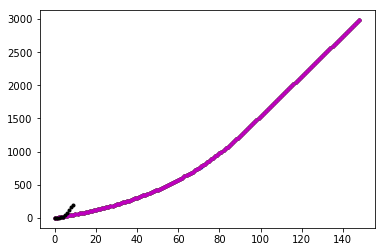

In [9]:
profileLen = floor(len(dfPD['z'].values)/(TTUdata.dataSetLength-1))
timeLen = floor(len(dfPD['z'].values)/profileLen)
print(TTUdata.dataSetLength)
print(profileLen)
print(timeLen)
plt.plot(np.mean(dfPD['z'].values.reshape(timeLen,profileLen),0),'b.')
plt.plot(np.mean(dfPD2['z'].values.reshape(timeLen,profileLen),0),'r.')
plt.plot(np.mean(dfPD3['z'].values.reshape(timeLen,profileLen),0),'g.')
plt.plot(np.mean(dfPD4['z'].values.reshape(timeLen,profileLen),0),'m.')
timeLenObs = floor(len(dfPDObs['z'].values)/10)
plt.plot(np.mean(dfPDObs['z'].values.reshape(timeLenObs,10),0),'k.')

In [10]:
dt=pd.Series(TTUdata.dataDict['datetime'])
len(dt)

59

array([datetime.datetime(2013, 11, 8, 17, 0),
       datetime.datetime(2013, 11, 8, 17, 0, 1),
       datetime.datetime(2013, 11, 8, 17, 0, 2), ...,
       datetime.datetime(2013, 11, 8, 18, 0, 57),
       datetime.datetime(2013, 11, 8, 18, 0, 58),
       datetime.datetime(2013, 11, 8, 18, 0, 59)], dtype=object)

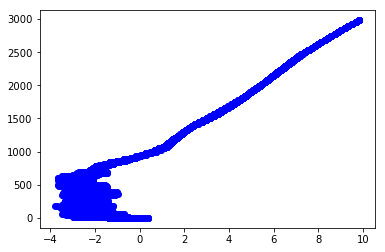

In [11]:
TTUdata.plotDataSetByKey('theta','z')
#myFmt = mdates.DateFormatter('%H:%M')
#TTUdataObs.plotDataSetByKey('datetime','z')
TTUdataObs.dataDict['datetime'][17*3600:(18*3600+1*60)][:]

(0, 600)

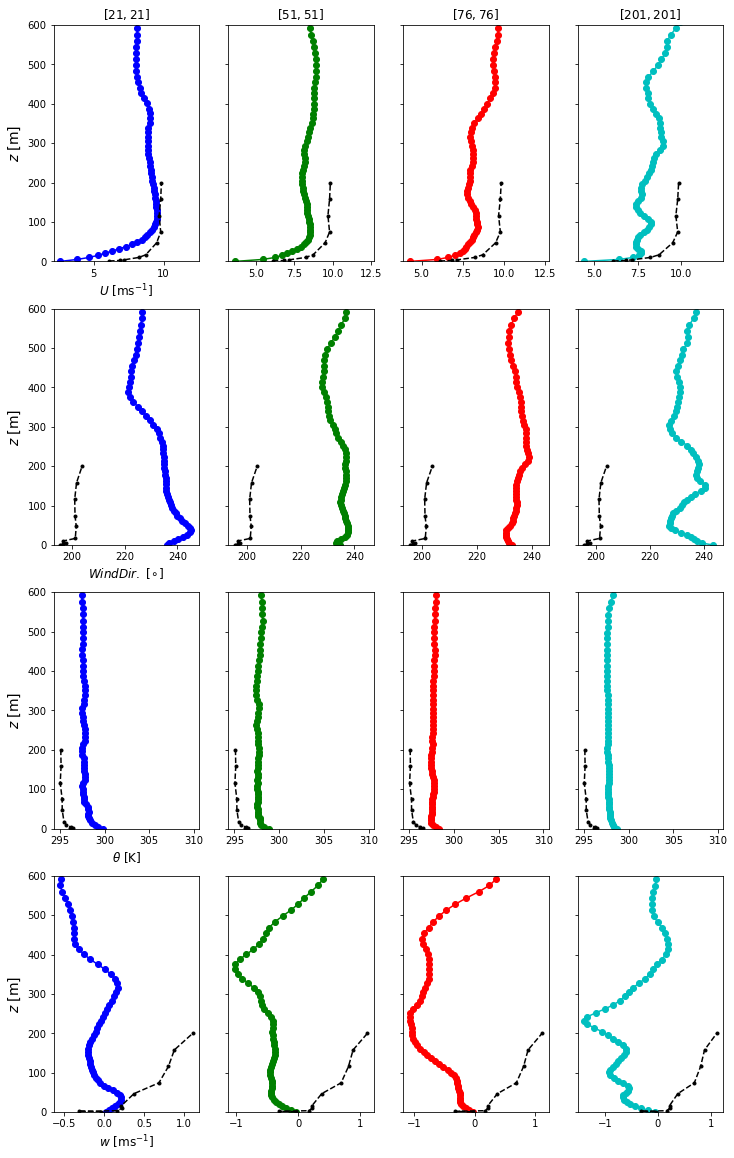

In [12]:
fig,axs = plt.subplots(4,4,sharey=True,figsize=(4*3.0,20))
ymin = 0;
ymax = 600;
strtHr=18;
scPERhr=3600;
scPERmin=60;
minInMn=10;
#print(np.mean(df['z'].values.reshape(timeLen,profileLen),0))
axs[0][0].set_ylabel(r'$z$ $[\mathrm{m}]$',fontsize=14)
axs[0][0].set_xlabel(r'$U$ $[\mathrm{ms^{-1}}]$',fontsize=12)
axs[0][0].set_title(r'$[21,21]$',fontsize=12)
axs[0][0].plot(np.mean(dfPD['wspd'].values.reshape(timeLen,profileLen),0),
            np.mean(dfPD['z'].values.reshape(timeLen,profileLen),0),'bo-')
axs[0][0].plot(np.mean(dfPDObs['wspd'].values.reshape(timeLenObs,10)[strtHr*scPERhr:(strtHr*scPERhr+minInMn*scPERmin)][:],0),
               dfPDObs['z'].values.reshape(timeLenObs,10)[1][:],'k.--')
axs[0][1].set_title(r'$[51,51]$',fontsize=12)
axs[0][1].plot(np.mean(dfPD2['wspd'].values.reshape(timeLen,profileLen),0),
            np.mean(dfPD2['z'].values.reshape(timeLen,profileLen),0),'go-')
axs[0][1].plot(np.mean(dfPDObs['wspd'].values.reshape(timeLenObs,10)[strtHr*scPERhr:(strtHr*scPERhr+minInMn*scPERmin)][:],0),
               dfPDObs['z'].values.reshape(timeLenObs,10)[1][:],'k.--')
axs[0][2].set_title(r'$[76,76]$',fontsize=12)
axs[0][2].plot(np.mean(dfPD3['wspd'].values.reshape(timeLen,profileLen),0),
            np.mean(dfPD3['z'].values.reshape(timeLen,profileLen),0),'ro-')
axs[0][2].plot(np.mean(dfPDObs['wspd'].values.reshape(timeLenObs,10)[strtHr*scPERhr:(strtHr*scPERhr+minInMn*scPERmin)][:],0),
               dfPDObs['z'].values.reshape(timeLenObs,10)[1][:],'k.--')
axs[0][3].set_title(r'$[201,201]$',fontsize=12)
axs[0][3].plot(np.mean(dfPD4['wspd'].values.reshape(timeLen,profileLen),0),
            np.mean(dfPD4['z'].values.reshape(timeLen,profileLen),0),'co-')
axs[0][3].plot(np.mean(dfPDObs['wspd'].values.reshape(timeLenObs,10)[strtHr*scPERhr:(strtHr*scPERhr+minInMn*scPERmin)][:],0),
               dfPDObs['z'].values.reshape(timeLenObs,10)[1][:],'k.--')

axs[1][0].set_ylabel(r'$z$ $[\mathrm{m}]$',fontsize=14)
axs[1][0].set_xlabel(r'$Wind Dir.$ $[\mathrm{\circ}]$',fontsize=12)
axs[1][0].plot(np.mean(dfPD['wdir'].values.reshape(timeLen,profileLen),0),
            np.mean(dfPD['z'].values.reshape(timeLen,profileLen),0),'bo-')
axs[1][0].plot(np.mean(dfPDObs['wdir'].values.reshape(timeLenObs,10)[strtHr*scPERhr:(strtHr*scPERhr+minInMn*scPERmin)][:],0),
               dfPDObs['z'].values.reshape(timeLenObs,10)[1][:],'k.--')
axs[1][1].plot(np.mean(dfPD2['wdir'].values.reshape(timeLen,profileLen),0),
            np.mean(dfPD2['z'].values.reshape(timeLen,profileLen),0),'go-')
axs[1][1].plot(np.mean(dfPDObs['wdir'].values.reshape(timeLenObs,10)[strtHr*scPERhr:(strtHr*scPERhr+minInMn*scPERmin)][:],0),
               dfPDObs['z'].values.reshape(timeLenObs,10)[1][:],'k.--')
axs[1][2].plot(np.mean(dfPD3['wdir'].values.reshape(timeLen,profileLen),0),
            np.mean(dfPD3['z'].values.reshape(timeLen,profileLen),0),'ro-')
axs[1][2].plot(np.mean(dfPDObs['wdir'].values.reshape(timeLenObs,10)[strtHr*scPERhr:(strtHr*scPERhr+minInMn*scPERmin)][:],0),
               dfPDObs['z'].values.reshape(timeLenObs,10)[1][:],'k.--')
axs[1][3].plot(np.mean(dfPD4['wdir'].values.reshape(timeLen,profileLen),0),
            np.mean(dfPD4['z'].values.reshape(timeLen,profileLen),0),'co-')
axs[1][3].plot(np.mean(dfPDObs['wdir'].values.reshape(timeLenObs,10)[strtHr*scPERhr:(strtHr*scPERhr+minInMn*scPERmin)][:],0),
               dfPDObs['z'].values.reshape(timeLenObs,10)[1][:],'k.--')

axs[2][0].set_ylabel(r'$z$ $[\mathrm{m}]$',fontsize=14)
axs[2][0].set_xlabel(r'$\theta$ $[\mathrm{K}]$',fontsize=12)
axs[2][0].plot(300.0+np.mean(dfPD['theta'].values.reshape(timeLen,profileLen),0),
            np.mean(dfPD['z'].values.reshape(timeLen,profileLen),0),'bo-')
axs[2][0].plot(np.mean(dfPDObs['theta'].values.reshape(timeLenObs,10)[strtHr*scPERhr:(strtHr*scPERhr+minInMn*scPERmin)][:],0),
               dfPDObs['z'].values.reshape(timeLenObs,10)[1][:],'k.--')
axs[2][1].plot(300.0+np.mean(dfPD2['theta'].values.reshape(timeLen,profileLen),0),
            np.mean(dfPD2['z'].values.reshape(timeLen,profileLen),0),'go-')
axs[2][1].plot(np.mean(dfPDObs['theta'].values.reshape(timeLenObs,10)[strtHr*scPERhr:(strtHr*scPERhr+minInMn*scPERmin)][:],0),
               dfPDObs['z'].values.reshape(timeLenObs,10)[1][:],'k.--')
axs[2][2].plot(300.0+np.mean(dfPD3['theta'].values.reshape(timeLen,profileLen),0),
            np.mean(dfPD3['z'].values.reshape(timeLen,profileLen),0),'ro-')
axs[2][2].plot(np.mean(dfPDObs['theta'].values.reshape(timeLenObs,10)[strtHr*scPERhr:(strtHr*scPERhr+minInMn*scPERmin)][:],0),
               dfPDObs['z'].values.reshape(timeLenObs,10)[1][:],'k.--')
axs[2][3].plot(300.0+np.mean(dfPD4['theta'].values.reshape(timeLen,profileLen),0),
            np.mean(dfPD4['z'].values.reshape(timeLen,profileLen),0),'co-')
axs[2][3].plot(np.mean(dfPDObs['theta'].values.reshape(timeLenObs,10)[strtHr*scPERhr:(strtHr*scPERhr+minInMn*scPERmin)][:],0),
               dfPDObs['z'].values.reshape(timeLenObs,10)[1][:],'k.--')

axs[3][0].set_ylabel(r'$z$ $[\mathrm{m}]$',fontsize=14)
axs[3][0].set_xlabel(r'$w$ $[\mathrm{ms^{-1}}]$',fontsize=12)
axs[3][0].plot(np.mean(dfPD['w'].values.reshape(timeLen,profileLen),0),
            np.mean(dfPD['z'].values.reshape(timeLen,profileLen),0),'bo-')
axs[3][0].plot(np.mean(dfPDObs['w'].values.reshape(timeLenObs,10)[strtHr*scPERhr:(strtHr*scPERhr+minInMn*scPERmin)][:],0),
               dfPDObs['z'].values.reshape(timeLenObs,10)[1][:],'k.--')
axs[3][1].plot(np.mean(dfPD2['w'].values.reshape(timeLen,profileLen),0),
            np.mean(dfPD2['z'].values.reshape(timeLen,profileLen),0),'go-')
axs[3][1].plot(np.mean(dfPDObs['w'].values.reshape(timeLenObs,10)[strtHr*scPERhr:(strtHr*scPERhr+minInMn*scPERmin)][:],0),
               dfPDObs['z'].values.reshape(timeLenObs,10)[1][:],'k.--')
axs[3][2].plot(np.mean(dfPD3['w'].values.reshape(timeLen,profileLen),0),
            np.mean(dfPD3['z'].values.reshape(timeLen,profileLen),0),'ro-')
axs[3][2].plot(np.mean(dfPDObs['w'].values.reshape(timeLenObs,10)[strtHr*scPERhr:(strtHr*scPERhr+minInMn*scPERmin)][:],0),
               dfPDObs['z'].values.reshape(timeLenObs,10)[1][:],'k.--')
axs[3][3].plot(np.mean(dfPD4['w'].values.reshape(timeLen,profileLen),0),
            np.mean(dfPD4['z'].values.reshape(timeLen,profileLen),0),'co-')
axs[3][3].plot(np.mean(dfPDObs['w'].values.reshape(timeLenObs,10)[strtHr*scPERhr:(strtHr*scPERhr+minInMn*scPERmin)][:],0),
               dfPDObs['z'].values.reshape(timeLenObs,10)[1][:],'k.--')

axs[0][0].set_ylim([ymin,ymax])


In [ ]:
figFileName = "testFigure20z_TTU-JDM.png" #
fig.savefig(figFileName,dpi=300)